# Importing utilities function from utils.py
<br>Loading the dataset.<br>
<br>Initial Review: Utilize head() to view the dataset's first few rows or summary statistics. 
<br>This step helps in identifying any apparent issues with data types or missing values.

In [2]:
import utils
import pandas as pd
# Load the dataset
file_path = './data/adjusted_retail_sales_data_v2.csv'
sales_data = utils.load_data(file_path)

if sales_data is not None:
    display(sales_data.head())

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Female,1838,35,Clothing,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5


# <h5>Initial Exploration : Analyzing the raw dataset.</h5>
<p>It is often beneficial to perform initial exploratory data analysis, such as using <i><b>describe()</b></i> and <i><b>checking for missing values</b></i>
<br>Before making any transformations or filtering the dataset.
<br>This approach allows you to understand the dataset in its raw form and make informed decisions about how to clean and process it.</p>

In [3]:
sales_data = utils.convert_data_types(sales_data,
                                 date_cols=['SalesDate'],
                                 numeric_cols=['SalesAmount','CustomerAge' , 'ProductRatings'] ,
                                 categorical_cols=['ProductCategory' , 'CustomerGender','CustomerLocation'])


if sales_data is not None:
    utils.describe_statistics(sales_data) # Perform initial descriptive statistics analysis

    # Additional Categorical Analysis
    print("\nCategorical Columns Analysis:")

    utils.analyze_categorical_columns(sales_data, 
        ['ProductCategory', 'CustomerGender', 'CustomerLocation'])  # Analyze categorical columns

    # Check and print missing values
    display(utils.find_rows_with_missing_values(sales_data))

    # Conclusions from initial exploration
    print("\n--- Initial Exploration Conclusions ---\n")

    # Analyze potential outliers in numeric columns
    utils.analyze_outliers(sales_data, ['SalesAmount', 'CustomerAge', 'ProductRatings'])


Initial Descriptive Statistics:
                         SalesDate ProductCategory   SalesAmount  CustomerAge  \
count                          997            1000  9.940000e+02  1000.000000   
unique                         NaN               4           NaN          NaN   
top                            NaN     Electronics           NaN          NaN   
freq                           NaN             357           NaN          NaN   
mean    2023-01-11 20:46:27.562688             NaN  2.867501e+03    29.177000   
min            2022-01-02 00:00:00             NaN  2.200000e+01     2.000000   
25%            2022-07-03 00:00:00             NaN  5.200000e+02    22.000000   
50%            2023-01-26 00:00:00             NaN  9.870000e+02    22.000000   
75%            2023-07-16 00:00:00             NaN  1.428000e+03    35.000000   
max            2023-12-31 00:00:00             NaN  1.875000e+06   200.000000   
std                            NaN             NaN  5.944267e+04    11.680844

c:\Users\theko\Documents\Techpro\Final-Project-TechPro-DS\utils.py:202: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return rows_with_missing_values.style.applymap(highlight_nans)


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
7,NaT,Clothing,1656.000000,35,Male,USA,3.000000
18,2023-12-22 00:00:00,Clothing,nan,35,Male,Canada,5.000000
65,2023-08-09 00:00:00,Electronics,nan,35,Female,Japan,3.000000
72,2023-09-17 00:00:00,Home Appliances,nan,35,Male,USA,3.000000
73,NaT,Home Appliances,710.000000,35,Female,India,4.000000
91,NaT,Home Appliances,994.000000,35,Female,USA,5.000000
290,2023-09-19 00:00:00,Clothing,nan,22,Female,India,1.000000
472,2022-04-27 00:00:00,Home Appliances,nan,35,Unknown,Canada,3.000000
487,2023-04-16 00:00:00,Home Appliances,801.000000,22,Male,USA,nan
570,2023-10-21 00:00:00,Clothing,1822.000000,22,Male,Canada,nan



--- Initial Exploration Conclusions ---


--- Potential Outliers Analysis ---
The 'SalesAmount' column may contain outliers as indicated by a high max/standard deviation ratio.
The 'CustomerAge' column may contain outliers as indicated by a high max/standard deviation ratio.
The 'ProductRatings' column may contain outliers as indicated by a high max/standard deviation ratio.


# <h2>Data Cleaning and Transformation Steps</h2>

<p><strong>1. Handling Missing Values:</strong></p>
<ul>
  <li><em>SalesAmount</em>: Impute missing values with the median or remove rows if missing values are not randomly distributed.</li>
  <li><em>ProductRatings</em>: Impute missing values with the median or remove rows.</li>
</ul>

<p><strong>2. Addressing Outliers:</strong></p>
<ul>
  <li><em>SalesAmount</em>: Identify and handle outliers using methods like IQR. Options include capping, replacing, or removing these values.</li>
  <li><em>ProductRatings</em>: Values outside the range of 1 to 5 should be corrected or removed.</li>
</ul>

<p><strong>3. Correcting Data Types:</strong></p>
<ul>
  <li>Convert <em>SalesDate</em> to datetime format.</li>
  <li>Ensure <em>SalesAmount</em> and <em>ProductRatings</em> are numeric.</li>
</ul>

<p><strong>4. Ensuring Data Consistency:</strong></p>
<ul>
  <li>Standardize categories in <em>ProductCategory</em>, <em>CustomerGender</em>, and <em>CustomerLocation</em>.</li>
</ul>

<p><strong>5. Filtering Inconsistent Data:</strong></p>
<ul>
  <li>Remove rows with invalid categories in <em>ProductCategory</em>, <em>CustomerGender</em>, or <em>CustomerLocation</em>.</li>
</ul>

<p><strong>6. Feature Engineering (if applicable):</strong></p>
<ul>
  <li>Create new features like month or year from <em>SalesDate</em> . Such new features that might better capture the patterns in the data.</li>
</ul>


In [4]:
# ... [Code for data cleaning and transformation]
if sales_data is not None:
    # Assuming sales_data is already loaded and initial exploration is done
    
    # Filtering Inconsistent Data
    sales_data = sales_data.dropna(subset=['SalesDate', 'CustomerLocation']) # TODO Add to documentation: Could clear dates but didn't find a way to do this programmatically . So Decided to drop those rows as they were only 0.3% of the dataset 
    sales_data = utils.filter_data(sales_data, 'ProductCategory', valid_values= ['Clothing', 'Electronics', 'Home Appliances'])
    sales_data = utils.filter_data(sales_data, 'CustomerGender', valid_values=['Male', 'Female', 'Non-binary'])
    sales_data = utils.filter_data(sales_data, 'CustomerLocation',valid_values= ['Japan', 'Australia', 'India', 'USA', 'UK', 'Canada'])
    sales_data = utils.filter_data(sales_data, 'ProductRatings',  None, min_value= 1 ,max_value= 5)
    sales_data = utils.filter_data(sales_data, 'CustomerAge' ,None, min_value= 18 , max_value= 75) # BI ASSUMPTION : We are interested in a dynamic customer age  so we filter between 18-75
    
    # Handling Missing Values
    sales_data['SalesAmount'].fillna(sales_data['SalesAmount'].median(), inplace=True)
    sales_data['ProductRatings'].fillna(sales_data['ProductRatings'].median(), inplace=True)
    
    # Remove outliers from SalesAmount using the handle_outliers function
    sales_data = utils.handle_outliers_IQR(sales_data, 'SalesAmount')

    
    # Correcting Data Types and Ensuring Data Consistency
    sales_data = utils.convert_data_types(sales_data, date_cols=['SalesDate'], numeric_cols=['SalesAmount', 'ProductRatings'])
    
    # Feature Engineering
    sales_data['Month'] = sales_data['SalesDate'].dt.month
    sales_data['Year'] = sales_data['SalesDate'].dt.year
    

    # Exploration After Cleaning
    # Final check for missing values and outliers
    print("\nMissing Values After Cleaning:")
    missing_values_post_cleaning = utils.check_missing_values(sales_data)
    if missing_values_post_cleaning.sum() > 0:
        # Check and print missing values
        display(utils.find_rows_with_missing_values(sales_data))
    elif missing_values_post_cleaning.sum() == 0:
        print("Missing values have been successfully addressed.")
    else:
        raise Exception("Sorry, no numbers below zero on missing values sum")
  
    
    print("\n--- Post-Cleaning Exploration Conclusions ---")
    utils.describe_statistics(sales_data) # Perform post-cleaning descriptive statistics analysis

    
 # Analyze potential outliers in numeric columns
    utils.analyze_outliers(sales_data, ['SalesAmount', 'CustomerAge', 'ProductRatings'])



Missing Values After Cleaning:
Missing values have been successfully addressed.

--- Post-Cleaning Exploration Conclusions ---
Initial Descriptive Statistics:
                            SalesDate ProductCategory  SalesAmount  \
count                             956             956   956.000000   
unique                            NaN               3          NaN   
top                               NaN     Electronics          NaN   
freq                              NaN             343          NaN   
mean    2023-01-12 15:59:29.874477056             NaN   981.415272   
min               2022-01-02 00:00:00             NaN    22.000000   
25%               2022-07-03 18:00:00             NaN   520.000000   
50%               2023-01-26 12:00:00             NaN   987.000000   
75%               2023-07-17 00:00:00             NaN  1421.250000   
max               2023-12-31 00:00:00             NaN  1994.000000   
std                               NaN             NaN   535.752166   


# <h5>To analyze the patterns like average sales per product category, age distribution of customers, and typical product ratings from your dataset, we can use Pandas to group and aggregate the data. Let's break down the analysis into three parts:</h5>
<ol>
<li ><b>Average Sales per Product Category:</b> This will show how sales vary across different product categories.</li>
<li><b>Age Distribution of Customers:</b> This will give insights into the demographic spread of the customers, which is vital for understanding your customer base.</li>
<li><b>Typical Product Ratings: </b>This will reveal how products are rated on average, which can be indicative of product performance and customer satisfaction.</li>
</ol>




In [5]:
average_sales_category = sales_data.groupby('ProductCategory', observed=True)['SalesAmount'].mean()
print("Average Sales per Product Category:")
print(average_sales_category , "\n")

age_distribution = sales_data['CustomerAge'].value_counts().sort_index()
print("Age Distribution of Customers:")
print(age_distribution, "\n")

average_product_ratings = sales_data['ProductRatings'].mean()
print(f"Average Product Ratings: {average_product_ratings}")

Average Sales per Product Category:
ProductCategory
Clothing           974.512903
Electronics        982.046647
Home Appliances    987.762376
Name: SalesAmount, dtype: float64 

Age Distribution of Customers:
CustomerAge
20      1
22    491
35    464
Name: count, dtype: int64 

Average Product Ratings: 2.938284518828452


Sales Trends Over Time

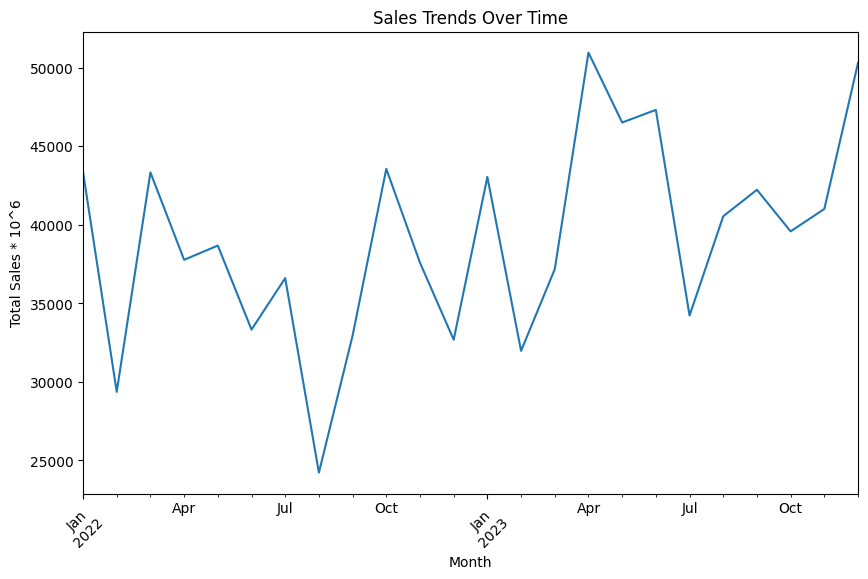

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Ensure 'SalesAmount' is a numeric column
sales_data['SalesAmount'] = pd.to_numeric(sales_data['SalesAmount'], errors='coerce')

# Group data by date and sum up sales
sales_over_time = sales_data.groupby(sales_data['SalesDate'].dt.to_period("M"))['SalesAmount'].sum()

# Plotting
sales_over_time.plot(kind='line', figsize=(10, 6))

# Use this to rotate the labels, if they overlap
plt.xticks(rotation=45)

plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales * 10^6')
plt.show()



Customer Demorgraphics


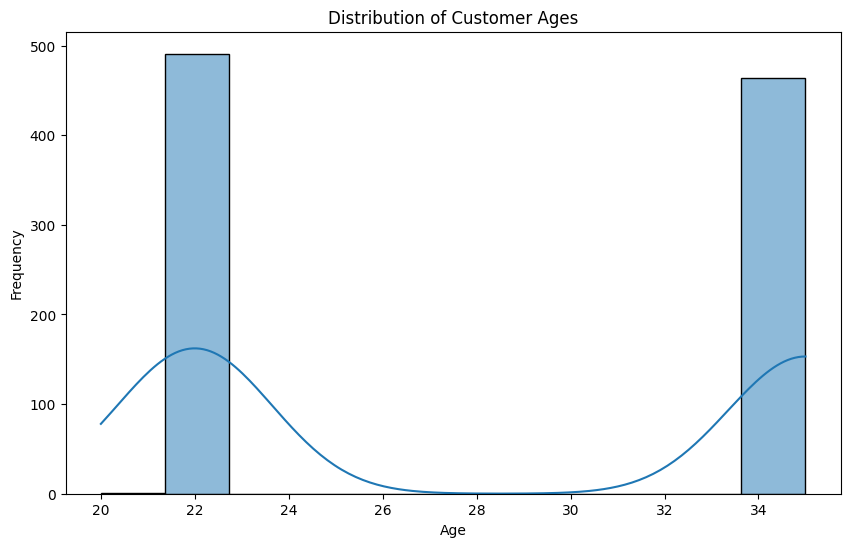

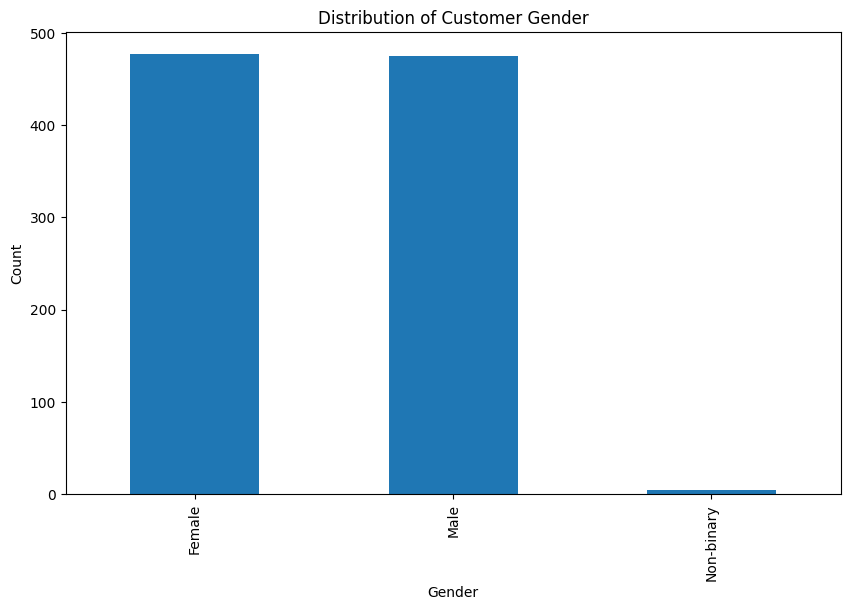

In [7]:
# Distribution of customers by age
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['CustomerAge'], kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of customers by gender
plt.figure(figsize=(10, 6))
sales_data['CustomerGender'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Product Performance

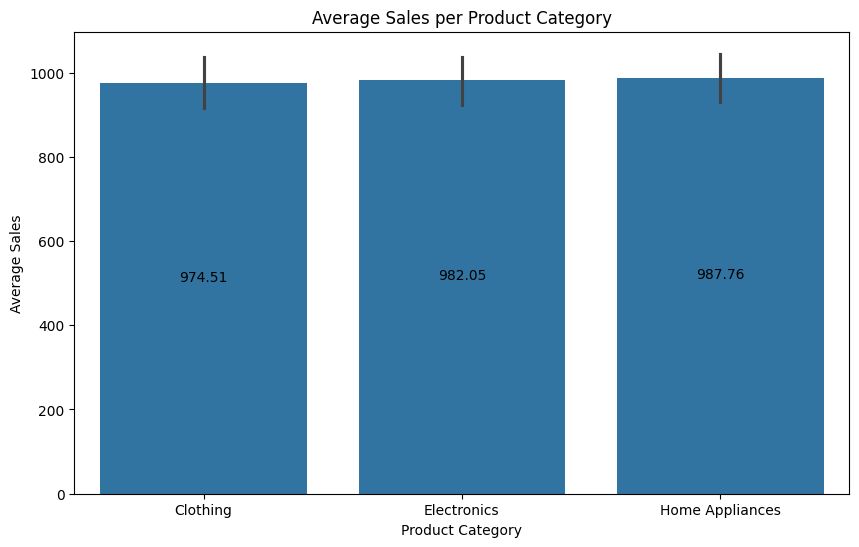

In [8]:
import numpy as np 
# Average sales per product category
plt.figure(figsize=(10, 6))
barplot= sns.barplot(x='ProductCategory', y='SalesAmount', data=sales_data, estimator=np.mean)
plt.title('Average Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')

# Annotate each bar with the average sales value
for bar in barplot.patches:
    # The text annotation for each bar should be its height (which represents the average sales).
    barplot.annotate(format(bar.get_height(), '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height() /2), 
                     ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')
    
plt.show()


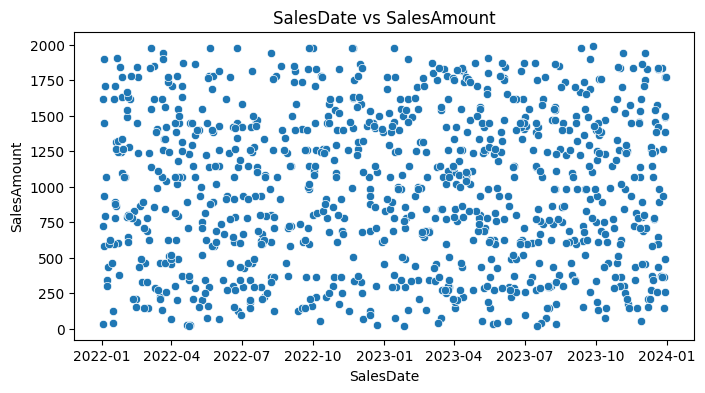

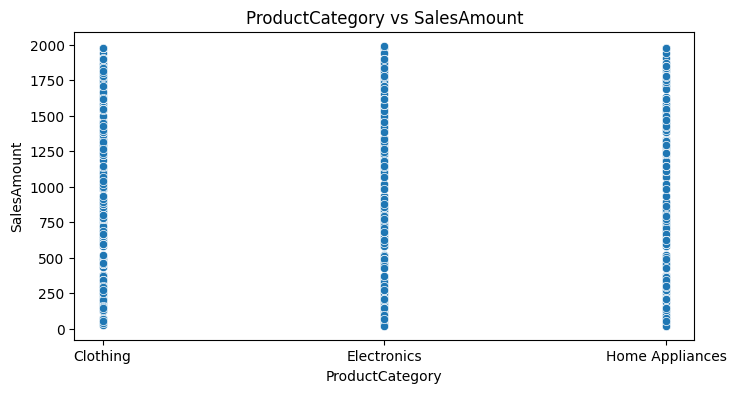

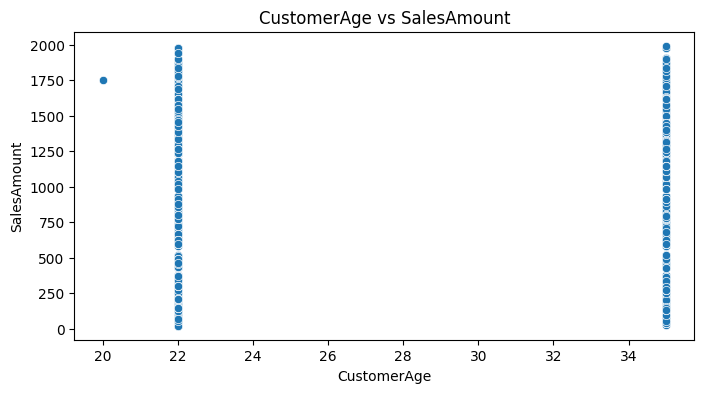

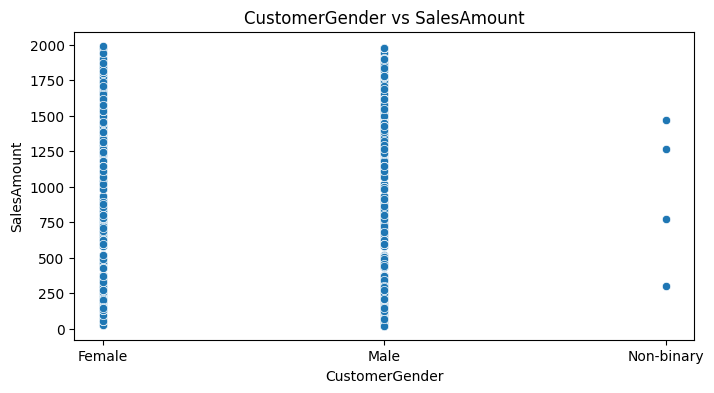

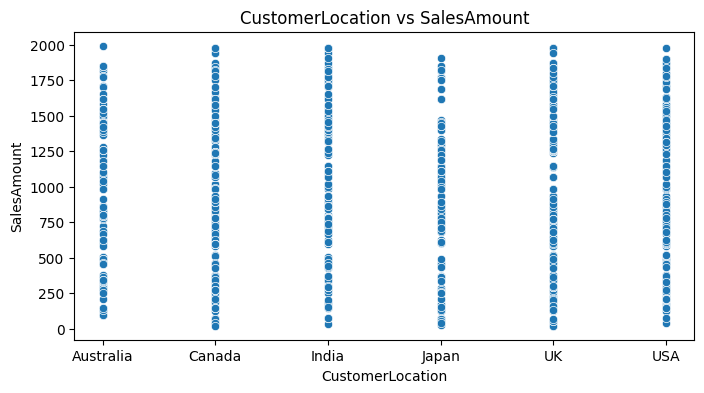

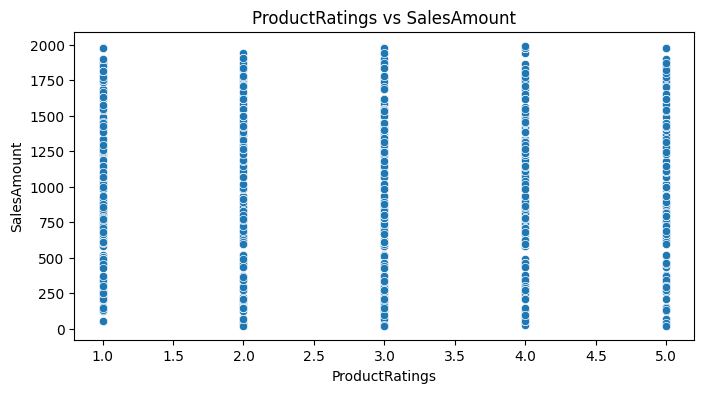

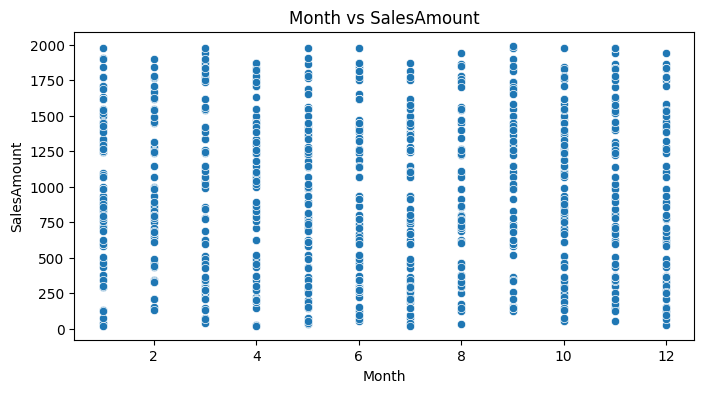

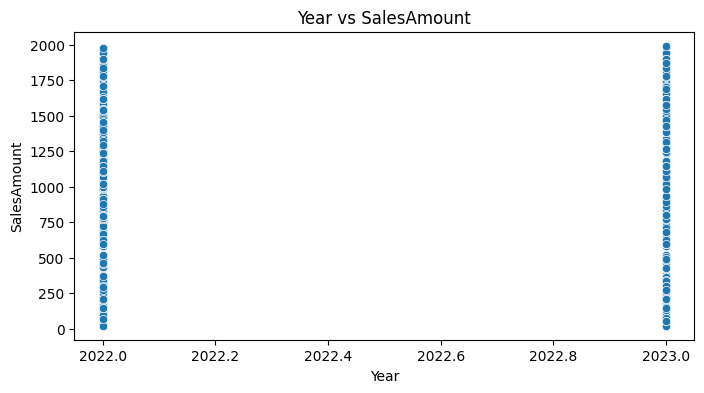

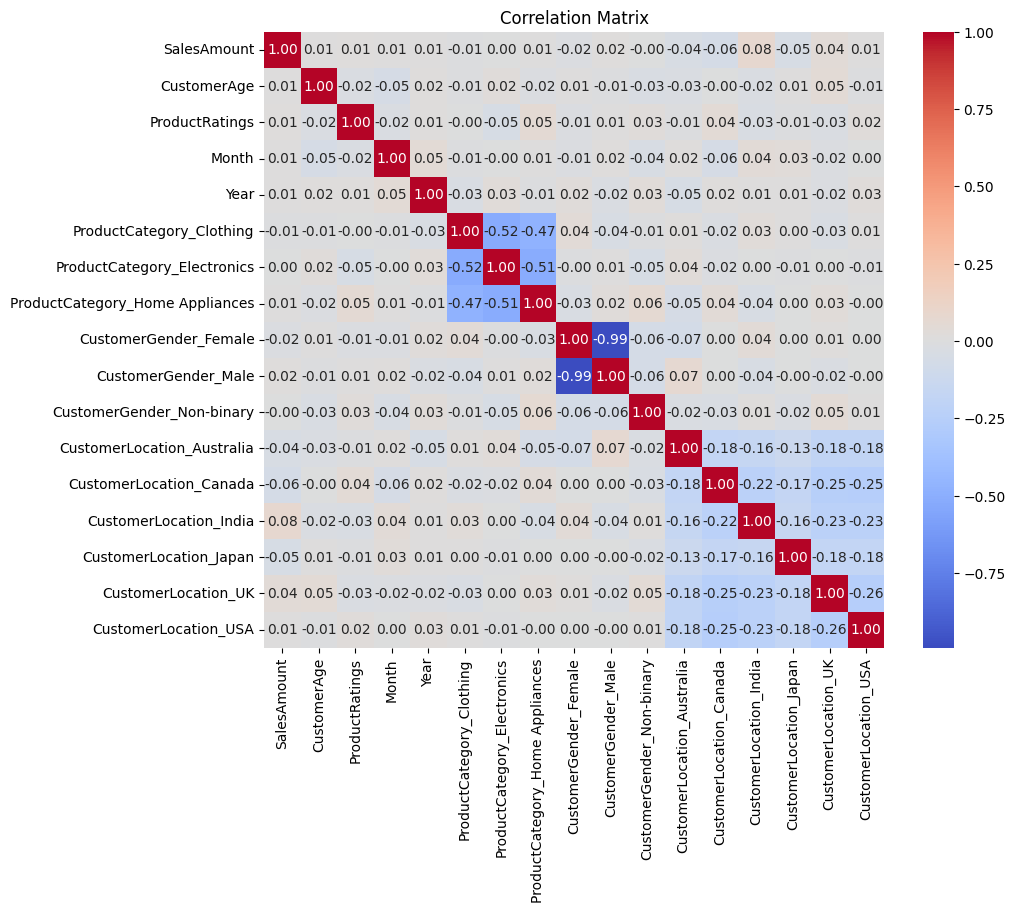

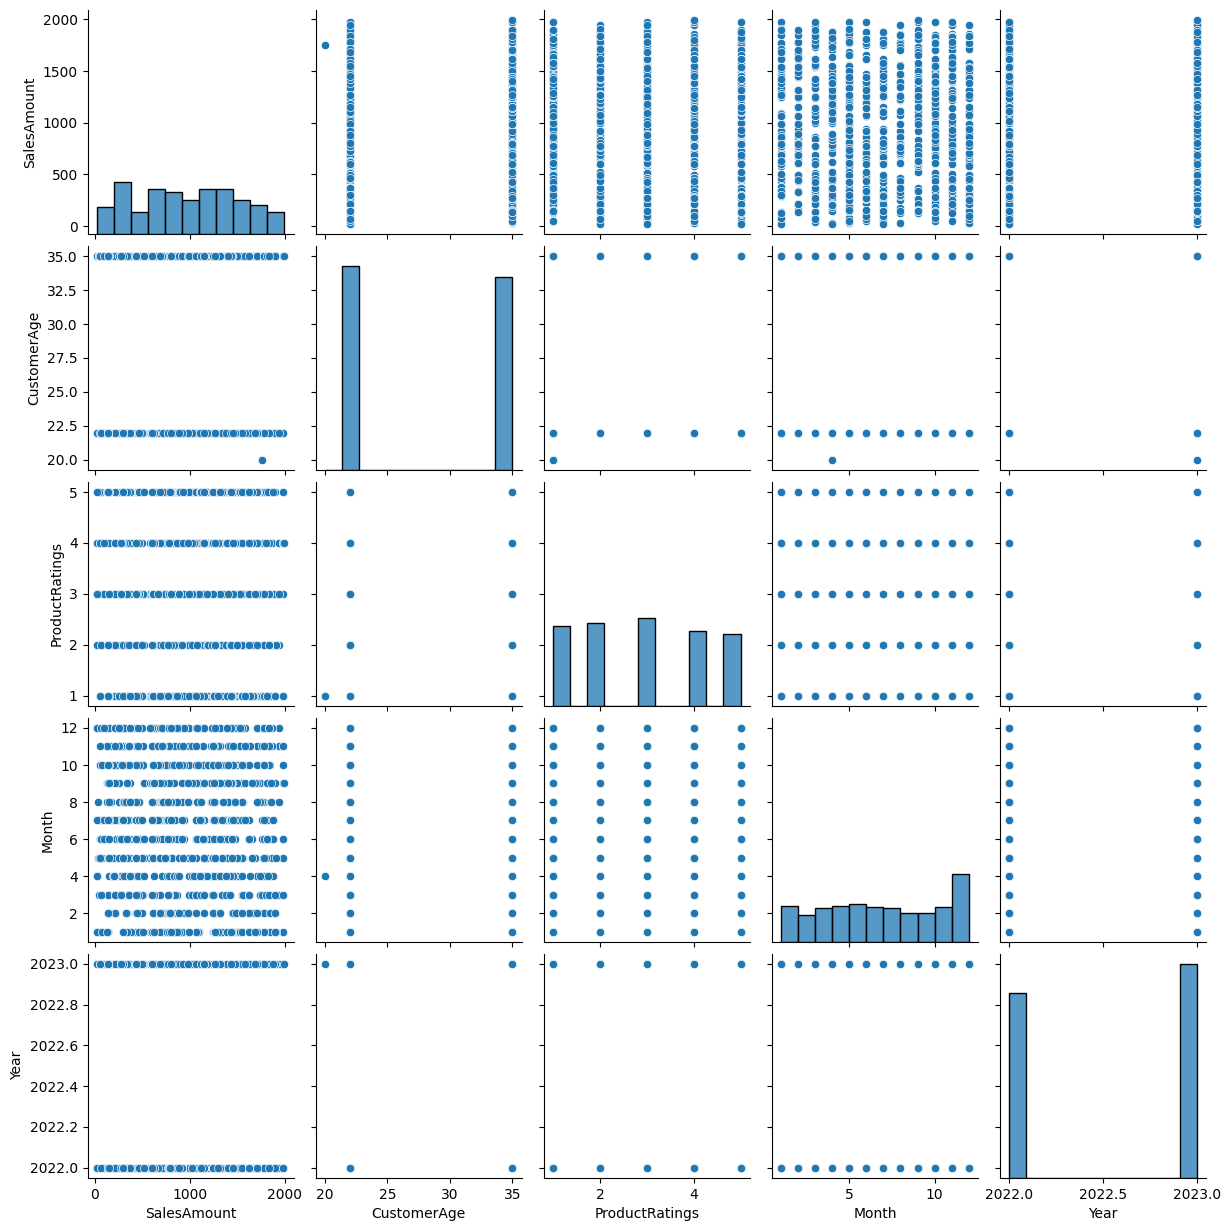

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming 'df' is your DataFrame and 'target' is your target variable
predictors = sales_data.columns.drop('SalesAmount')  # Adjust this if you have more columns to exclude

for predictor in predictors:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=sales_data[predictor], y=sales_data['SalesAmount'])
    plt.title(f'{predictor} vs SalesAmount')
    plt.show()


#-----------------2nd way---------------#
plt.figure(figsize=(10, 8))
sales_data_encoded = pd.get_dummies(sales_data.drop('SalesDate' , axis =1), columns=categorical_cols)
sns.heatmap(sales_data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#-----------------3rd way---------------#
sns.pairplot(sales_data)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical variables
categorical_cols = ['ProductCategory', 'CustomerGender', 'CustomerLocation']
sales_data_encoded = pd.get_dummies(sales_data.drop('SalesDate' , axis =1), columns=categorical_cols)

# Assuming 'SalesAmount' is your target variable
X = sales_data_encoded.drop('SalesAmount', axis=1)
# X = sales_data_encoded[['CustomerAge' , 'Month' , 'Year' , 'ProductRatings']] # Another approach with less independent variables


y = sales_data_encoded['SalesAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()


,CustomerAge,ProductRatings,Month,Year,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Appliances,CustomerGender_Female,CustomerGender_Male,CustomerGender_Non-binary,CustomerLocation_Australia,CustomerLocation_Canada,CustomerLocation_India,CustomerLocation_Japan,CustomerLocation_UK,CustomerLocation_USA
0,22,4.0,10,2023,False,False,True,False,True,False,False,False,False,False,False,True
1,22,5.0,9,2023,True,False,False,True,False,False,True,False,False,False,False,False
2,22,2.0,9,2022,False,True,False,False,True,False,False,False,False,False,True,False
4,35,5.0,9,2022,False,False,True,False,True,False,False,False,False,False,True,False
5,22,3.0,8,2023,True,False,False,False,True,False,True,False,False,False,False,False


TODO Finish documentaion

1. We train the model and see r*2 and mean squared
2. We plot the data points and model

R-squared: -0.018089416783040324
Mean Squared Error: 278291.36070839944


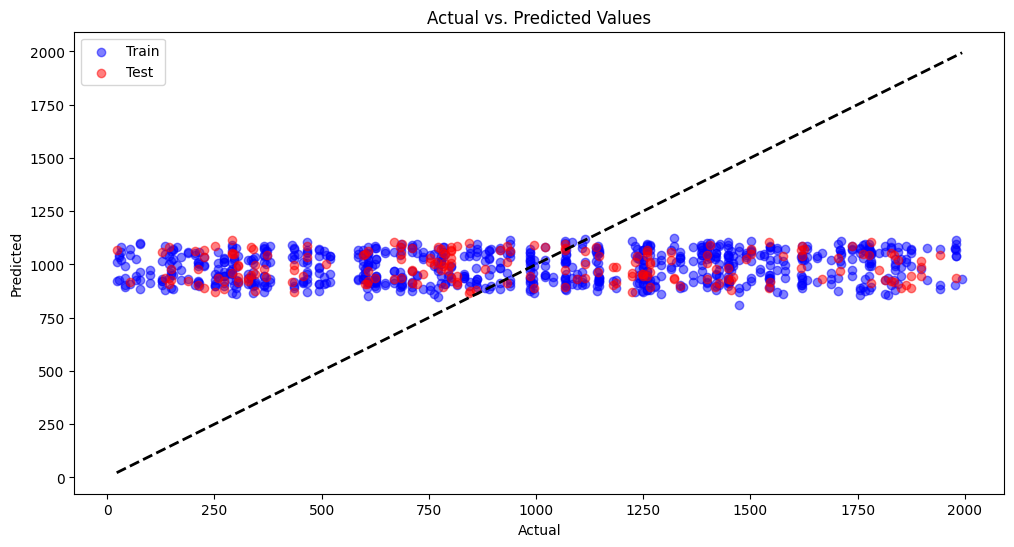

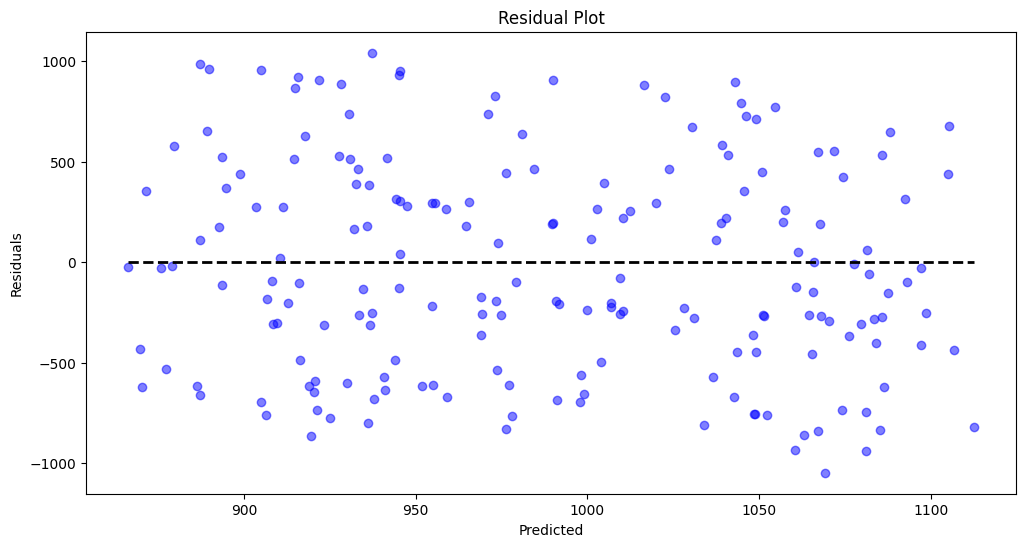

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plotting Actual vs. Predicted values
plt.figure(figsize=(12, 6))

# Training data in blue
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train')
# Test data in red
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Test')

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Perfect predictions line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', lw=2, linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='black', lw=2, linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
